In [1]:
# Imports
import pandas as pd
import mysql
from mysql.connector import Error
from csv import reader
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('pozary.csv')
df.head()

,id,miasto,czyPada,iloscWody,cenaAkcji
0,1,Bajo Pichanaqui,False,9039.65,118759.25
1,2,Manquiring,False,84217.87,68889.99
2,3,Predavac,True,99050.26,100031.46
3,4,Mir,True,68643.93,112996.67
4,5,Médanos,False,75685.47,45482.03


In [3]:
try:
    global conn
    conn = mysql.connector.connect(host='localhost',
        db='pozary', user='jakub', passwd='')
    if conn.is_connected():
        c = conn.cursor()
        c.execute("TRUNCATE pozary")
        print('Connected to database!')        
except Error as e:
    print(e)

Connected to database!


In [4]:
c = conn.cursor()
with open('pozary.csv', 'r') as read:
    csv_reader = reader(read)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            for i in csv_reader:
                insert_data = "INSERT INTO pozary(miasto, czyPada, iloscWody, cenaAkcji) VALUES (%s, %s, %s, %s);"
                value = (i[1], int(i[2] == 'true'), i[3], i[4])
                c.execute(insert_data, value)
                conn.commit()
print('Dodano rekordy z pliku csv')

Dodano rekordy z pliku csv


In [5]:
c.execute("SELECT * FROM pozary LIMIT 5")
print(c.fetchall())

[(1, 'Manquiring', 0, 84217.87, 68889.99), (2, 'Predavac', 1, 99050.26, 100031.46), (3, 'Mir', 1, 68643.93, 112996.67), (4, 'Médanos', 0, 75685.47, 45482.03), (5, 'Sedatigede', 0, 91685.67, 134037.29)]


In [6]:
query = "SELECT * FROM pozary;"
result = pd.read_sql_query(query, conn)
result = pd.DataFrame(result)
result.to_csv('ZBazy.csv', index=True)
df = pd.read_csv('ZBazy.csv')
df.head()

,Unnamed: 0,id,miasto,czyPada,iloscWody,cenaAkcji
0,0,1,Manquiring,0,84217.87,68889.99
1,1,2,Predavac,1,99050.26,100031.46
2,2,3,Mir,1,68643.93,112996.67
3,3,4,Médanos,0,75685.47,45482.03
4,4,5,Sedatigede,0,91685.67,134037.29


In [7]:
def stats(col):
    print('Maksymalna wartość: ', np.max(col))
    print('Minimalan wartość: ', np.min(col))
    print('Średnia wartość: ', np.mean(col))
    print('Mediana: ', np.median(col))
    print('Odchylenie standardowe: ', st.stdev(col))
    print('Wariancja: ', st.variance(col))
    print('Górna mediana: ', st.median_high(col))
    print('Dolna mediana: ', st.median_low(col))

print('Statystyki dotyczące zużycia wody')
stats(df['iloscWody'])
print()
print('Statystyki dotyczące ceny akcji')
stats(df['cenaAkcji'])

Statystyki dotyczące zużycia wody
Maksymalna wartość:  99966.99
Minimalan wartość:  1091.83
Średnia wartość:  51035.331791791796
Mediana:  52579.45
Odchylenie standardowe:  28857.409307338145
Wariancja:  832750071.9312462
Górna mediana:  52579.45
Dolna mediana:  52579.45

Statystyki dotyczące ceny akcji
Maksymalna wartość:  139889.86
Minimalan wartość:  11332.89
Średnia wartość:  76222.78418418417
Mediana:  78899.7
Odchylenie standardowe:  37733.71592414487
Wariancja:  1423833317.444064
Górna mediana:  78899.7
Dolna mediana:  78899.7


In [8]:
correlation = df.corr()
print(correlation)

            Unnamed: 0        id   czyPada  iloscWody  cenaAkcji
Unnamed: 0    1.000000  1.000000  0.023794   0.023009   0.010346
id            1.000000  1.000000  0.023794   0.023009   0.010346
czyPada       0.023794  0.023794  1.000000  -0.001567  -0.036545
iloscWody     0.023009  0.023009 -0.001567   1.000000   0.054362
cenaAkcji     0.010346  0.010346 -0.036545   0.054362   1.000000


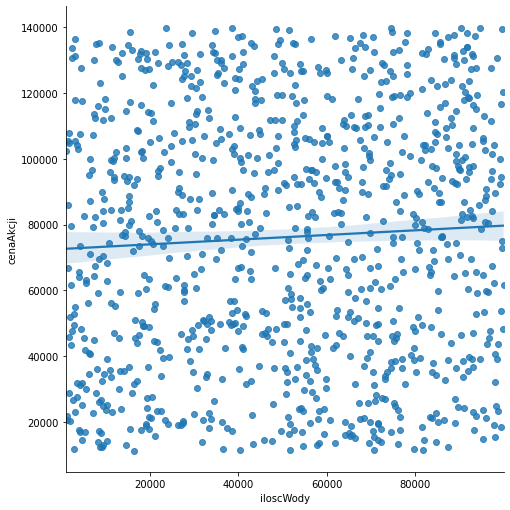

In [9]:
sns.lmplot(x='iloscWody',y='cenaAkcji',data=df,fit_reg=True, legend=True, scatter=True, size=7)

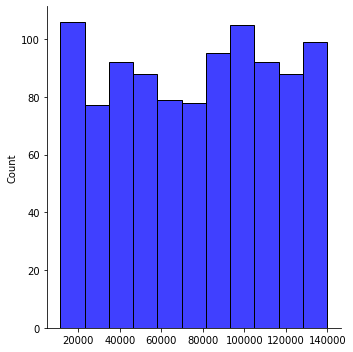

In [10]:
tnp = np.array(df['cenaAkcji'])
sns.displot(tnp, color='blue')
plt.show()

In [ ]:
conn.close()